In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
comment_data = []
with open('hotel_data/2024-11-14-CommentItem.jl', 'r') as f:
    for line in f:
        comment_data.append(json.loads(line))

comment_df = pd.DataFrame(comment_data)
comment_df.head()

,accommodationId,roomId,reviewedDate,reviewUrl,language,title,positiveText,negativeText,numNights,stayStatus,customerType,checkinDate,guestCountry,reviewScore
0,5174139,517413902,1729138438,950fc7fdc89d2650,es,None,Buena atención de nuestro host Brian.,None,1,stayed,FAMILIES,2024-10-16,Spain,10.0
1,5174139,517413901,1729138060,421a33fe69cb99a8,es,None,Las habitaciones con balcón privado y el baño ...,La música por la tarde al atardecer un poco al...,1,stayed,FAMILIES,2024-10-16,Spain,10.0
2,5174139,517413901,1729136828,480bad356493af44,it,Esperienza speciale,"Una bellissima esperienza, una menzione specia...",None,1,stayed,FAMILIES,2024-10-16,Italy,10.0
3,5174139,517413902,1729053327,4b885bd3c2627f74,xu,We had a great time. We fell in love with some...,"The cruise boat was very nice, clean and excep...",I wish we would’ve received a bigger room as w...,1,stayed,FAMILIES,2024-09-17,United States,9.0
4,5174139,517413901,1728970806,df16f91ded2518ab,es,None,"Todo el crucero fue espectacular, la comida la...","Todo estaba perfecto; comida, servicio, limpie...",1,stayed,COUPLES,2024-10-13,Spain,9.0


In [3]:
import json
from datetime import datetime, timedelta

def increase_dates_by_one_day(checkin, checkout):
    checkin_date = datetime.strptime(checkin, "%Y-%m-%d")
    checkout_date = datetime.strptime(checkout, "%Y-%m-%d")
    new_checkin = (checkin_date + timedelta(days=1)).strftime("%Y-%m-%d")
    new_checkout = (checkout_date + timedelta(days=1)).strftime("%Y-%m-%d")
    return new_checkin, new_checkout

def process_jl_file(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            data = json.loads(line)
            new_checkin, new_checkout = increase_dates_by_one_day(data['checkin'], data['checkout'])
            data['checkin'] = new_checkin
            data['checkout'] = new_checkout
            outfile.write(json.dumps(data) + '\n')

# Specify the input and output file paths
input_file = '/Users/mac/HCMUS/ItelligentAnalApp/project/airflow_project/booking/hotel_data/input.jl'
output_file = '/Users/mac/HCMUS/ItelligentAnalApp/project/airflow_project/booking/hotel_data/2024-11-14-RoomPriceItem.jl'

# Process the .jl file
process_jl_file(input_file, output_file)

In [5]:
with open('comment.jl') as f:
    data = f.readlines()
df = pd.DataFrame([json.loads(x) for x in data])
print(len(df))
df.head()

967


,accommodationId,roomId,reviewedDate,language,title,positiveText,negativeText,numNights,stayStatus,customerType,checkinDate,guestCountry,reviewScore
0,11753130,1175313001,1716802395,de,Der Anbieter hat sich nicht an das versprochen...,"Klimaanlage funktioniert, es gibt eine Waschma...",- Früherer Check-in gegen monetäre Zahlung abg...,1,stayed,COUPLES,2024-05-25,Germany,1.0
1,11812825,1181282501,1726363860,fr,None,None,"Lit très dur, Clim à fond sur la tête dans le ...",1,stayed,GROUP_OF_FRIENDS,2024-08-08,France,6.0
2,11845281,1184528101,1722937834,vi,Rất ưng căn villa này,Phòng ốc sạch sẽ mới,None,1,non_stayed,GROUP_OF_FRIENDS,2024-07-02,Vietnam,9.0
3,11961541,1196154102,1716641728,pl,None,None,None,1,stayed,COUPLES,2024-04-28,Philippines,10.0
4,11961541,1196154101,1714732150,vi,None,None,None,1,stayed,SOLO_TRAVELLERS,2024-04-28,Vietnam,6.0


In [3]:
len(df.drop_duplicates())

867

In [16]:
with open('hotel_data/2024-10-29-AccommodationItem.jl') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)
print(len(df))
df.head()

12053


,lat,lng,unities,checkinTime,checkoutTime,petInfo,paymentMethods,location,id,name,typeId,description,star,reviewScore,reviewCount,url,address
0,15.88057000,108.34161800,"[Free WiFi, Airport shuttle, Family rooms, Non...",From 14:00 to 23:30,From 12:00 to 13:00,Pets are not allowed.,[Cash],"Hoi An, Quang Nam, Vietnam",3699163,Three palms homestay,222,Situated within 1.2 km of Assembly Hall of Cha...,NaN,8.1,8,https://www.booking.com/hotel/vn/three-palms-h...,"472 Cửa Đại, Hội An"
1,15.91361039,108.33561033,"[Free WiFi, Airport shuttle, Family rooms, Res...",From 14:00 to 22:00,From 10:00 to 12:00,Pets are not allowed.,[Cash],"Hoi An, Quang Nam, Vietnam",12797852,An Bang Golden Beach Villa,204,"An Bang Golden Beach Villa has a garden, share...",3.0,0.0,0,https://www.booking.com/hotel/vn/po-an-bang-go...,"An Bang Beach, Cam An Ward, Hoi An"
2,15.88909362,108.36827657,"[Outdoor swimming pool, Free WiFi, Airport shu...",From 14:00 to 23:00,From 06:00 to 11:00,Pets are not allowed.,[Cash],"Hoi An, Quang Nam, Vietnam",12823595,Coco villa,213,Boasting air-conditioned accommodation with a ...,4.0,10.0,1,https://www.booking.com/hotel/vn/t-two-villa.e...,"DL4.2 Khu đô thị Casamia, thôn Võng Nhi, Phườn..."
3,15.88779008,108.35349867,"[Outdoor swimming pool, Free WiFi, Airport shu...",From 14:00 to 00:00,From 11:00 to 12:00,Pets are not allowed.,"[Visa, Mastercard, JCB, UnionPay debit card, U...","Hoi An, Quang Nam, Vietnam",11194290,Hoi An Coco Farm,203,Located in Hoi An and with An Bang Beach reach...,NaN,9.8,6,https://www.booking.com/hotel/vn/hoi-an-coco-f...,"Tổ 5, Thôn Thanh Đông, Xã Cẩm Thanh, Thành phố..."
4,15.88769527,108.32891169,"[Outdoor swimming pool, Free WiFi, Airport shu...",From 14:00,Until 12:00,Pets are not allowed.,"[Visa, Mastercard, UnionPay credit card, Cash]","Hoi An, Quang Nam, Vietnam",3558019,Hoi An Golden Holiday Villa,204,Hoi An Golden Holiday Villa features free bike...,3.0,8.7,7,https://www.booking.com/hotel/vn/hoi-an-golden...,"21 Nguyễn Hiền, Thành phố Hội An"


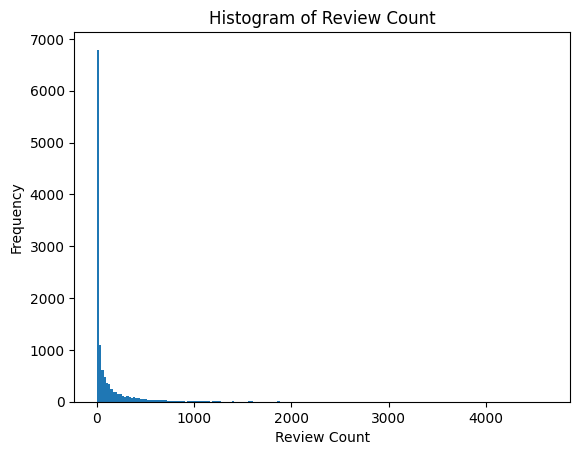

In [17]:
# histogram of review count
plt.hist(df['reviewCount'], bins=200)
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Histogram of Review Count')
plt.show()

In [20]:
#num hotels with < 10 reviews
print('Number of hotels with less than 10 reviews:', len(df[df['reviewCount'] > 100]))

Number of hotels with less than 10 reviews: 2952


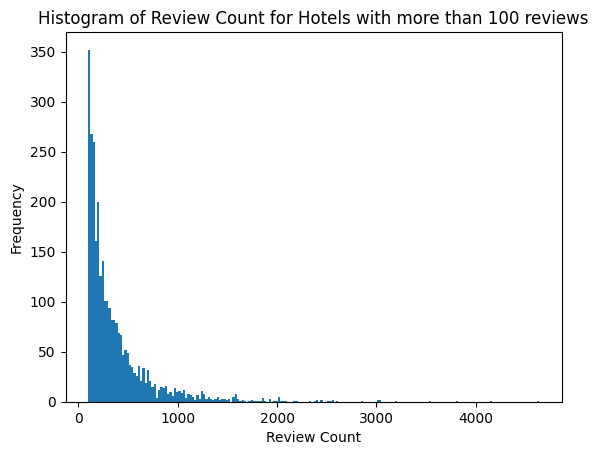

In [19]:
# histogram of hotel having more than 100 reviews
plt.hist(df[df['reviewCount'] > 100]['reviewCount'], bins=200)
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Histogram of Review Count for Hotels with more than 100 reviews')
plt.show()